In [1]:
import json

datasetpath = "../dataset/lyrics-1554383562280.json"

# https://github.com/stopwords-iso/stopwords-fr/edit/master/stopwords-fr.json
stopwords_from_github = ["j'te", "j'ai", "j'suis", "j'veux", "t'as", "c'est", "qu'il", "t'es", "di", "qu'on", "j'me", "j'fais", "a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô"]

with open(datasetpath) as json_file:  
    data = json.load(json_file)

    
"""
lyrics.json contains json dataset. See the scrapper component.
Example JSON data set :
{
    "artistName": {
        "popularity": 0.2,
        "followers": 200,
        "image: "http://.../"
        "songs": [
            {
                "song": "songName",
                "lyrics": "lyrics\nlyrics\n",
            }
        ]
        
    }
}
"""
    
print("Number of artists :", len(data))


Number of artists : 119


In [2]:
data['lyrics']

KeyError: 'lyrics'

In [3]:
# Download NTLK dependencies

import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/grollaume/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/grollaume/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd

songs = []

section_pattern = r'\[[^\]]*\]'
stop_words = set(stopwords.words('french'))
stop_words.add(('de', 'le', 'ça', 'ca'))


for artist in data:
    for i, song in enumerate(data[artist]['songs']):
        #print(song['song'], i)
        # Remove Sections (eg: [Chorus])
        tokens = re.sub(section_pattern, '', song['lyrics'])
        tokens = set(word_tokenize(tokens))
        count_raw_words = len(tokens)
        
        # Remove punctionations & stopwords. We filter 1 char tokens
        tokens = [w for w in tokens if len(w) > 1 and not w.lower() in stopwords_from_github]
        count_filtered_words = len(tokens)
        

        #tokens = [w for w in tokens if not w in stop_words]
        
        song = {
            'artist': artist,
            'name': song['song'],
            'filtered_tokens': tokens,
            'count_raw_words': count_raw_words,
            'count_filtered_words': count_filtered_words,
            'artist_popularity': data[artist]['popularity'],
            'artist_followers': data[artist]['followers'],
            'artist_image': data[artist]['image'],
            #'lyrics': song['lyrics']
        }
        songs.append(song)
        
songs

## Create a Pandas Dataframe from the dict
df = pd.DataFrame(songs)
#, columns=['author', 'name', 'filtered_tokens', 'raw_word_counts', 'filtered_word_counts']) 
pd.set_option('display.max_rows', len(songs))


print("-- Processed stats")
print("> Count songs", len(songs))
print("> Count raw words :", df.loc[:, 'count_raw_words'].sum())
print("> Count filtered words :", df.loc[:, 'count_filtered_words'].sum())
pct = (df.loc[:, 'count_filtered_words'].sum() / df.loc[:, 'count_raw_words'].sum()) * 100
print("> ", pct, '% kept')

df.head(n=2000)

-- Processed stats
> Count songs 1189
> Count raw words : 305363
> Count filtered words : 208986
>  68.43854690974348 % kept


,artist,artist_followers,artist_image,artist_popularity,count_filtered_words,count_raw_words,filtered_tokens,name
0,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,181,284,"[pommade, moche, Gratte, Papin, Penalty, belek...",DA
1,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,128,206,"[panier, l'escalier, m'a, gars, Romeo, part, f...",Le monde ou rien
2,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,140,233,"[maille, pé, l'hôtesse, rêves, l'escalier, j'd...",Naha
3,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,217,335,"[l'obscurité, moche, contamine, rêves, poussez...",Jusqu'au dernier gramme
4,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,109,181,"[l'con, Gratte, jamais, belek, guerre, part, s...",Onizuka
5,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,126,204,"[n'DA, dingue-dingue, 10k, j'aime, hijo, pouca...",Bené
6,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,128,220,"[Manu, perds, passera, sauvages, compréhension...",À l'ammoniaque
7,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,197,300,"[J't'encule, dis-moi, j'la, baba, gnôle, l'con...",Au DD
8,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,131,206,"[l'obscurité, d'sa, m'aimes, rappeler, qu'j'ki...",Oh Lala
9,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,118,186,"[bats, voyage, commentaire, j'aime, chienne, P...",J'suis QLF


In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd

songs = []

section_pattern = r'\[[^\]]*\]'
stop_words = set(stopwords.words('french'))
stop_words.add(('de', 'le', 'ça', 'ca'))


for artist in data:
    for i, song in enumerate(data[artist]['songs']):
        
        song = {
            'lyrics': song['lyrics']
        }
        songs.append(song)
        
songs

## Create a Pandas Dataframe from the dict
df = pd.DataFrame(songs)
df.head()

,lyrics
0,\n\n[Couplet 1 - Ademo]\nMa frappe y'a personn...
1,"\n\n[Couplet 1 : Ademo]\nJ'veux du L, j'veux d..."
2,\n\n[Produit par BBP]\n\n[Couplet 1 : N.O.S]\n...
3,\n\n[Couplet 1 : Ademo]\nJe suis à 91 mille li...
4,\n\n[Produit par BBP & Dolor]\n\n[Couplet 1 : ...


In [6]:
df['lyrics'].head

<bound method NDFrame.head of 0       \n\n[Couplet 1 - Ademo]\nMa frappe y'a personn...
1       \n\n[Couplet 1 : Ademo]\nJ'veux du L, j'veux d...
2       \n\n[Produit par BBP]\n\n[Couplet 1 : N.O.S]\n...
3       \n\n[Couplet 1 : Ademo]\nJe suis à 91 mille li...
4       \n\n[Produit par BBP & Dolor]\n\n[Couplet 1 : ...
5       \n\n[Intro : Ademo]\nBené Bené, Bené Bené, Ben...
6       \n\n[Couplet 1 : Ademo]\nOuais, ouais, ouais, ...
7       \n\n[Couplet 1 : Ademo]\nBats les couilles d'l...
8       \n\n[Couplet 1 - Ademo]\nJ'suis dans un merdie...
9       \n\n[Refrain : Ademo]\nOn voyage, j'm'en bats ...
10      \n\n[Intro: IZI & Rkomi]\nEhi ehi\nZona4Gang\n...
11      \n\n[Strofa 1]\nAl passo ci sto da un po'\nUn ...
12      \n\n[Intro: Rkomi]\nOra tarda, c'è bufera\nDor...
13      \n\n[Intro]\nIo in terra, brr\nIo in terra, pa...
14      \n\n[Couplet 1]\nEh bouge pas, on arrive\nDans...
15      \n\n[Strofa 1]\nNumero dieci la maglia, la ste...
16      \n\n[Intro: Falco, Ciccio & Rkomi]

In [7]:
summary = df['lyrics'].tolist()
punctuation = ['.', ',', ':']
texts = []

for text in summary:
    cleaned_text = str(text).lower()   
    for mark in punctuation:
        cleaned_text = cleaned_text.replace(mark, '')       
    texts.append(cleaned_text.split())

In [8]:
import gensim.corpora as corpora
dictionary = corpora.Dictionary(texts)

In [9]:
word_list = []
for key, value in dictionary.dfs.items():
    if value > 100:
        word_list.append(key)

In [10]:
dictionary.filter_tokens(word_list)
corpus = [dictionary.doc2bow(text) for text in texts]

In [12]:
import numpy as np
import gensim
np.random.seed(76543)
lda = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=5)

In [13]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [14]:
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/home/grollaume/miniconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [4]:
# Songs with lower word count

df.sort_values(by='count_filtered_words')

,artist,artist_followers,artist_image,artist_popularity,count_filtered_words,count_raw_words,filtered_tokens,name
1088,Bouga,1221,https://i.scdn.co/image/fe3ad382b47d1f713489d4...,36,0,0,[],Bougainvillea Chamber
1083,Bouga,1221,https://i.scdn.co/image/fe3ad382b47d1f713489d4...,36,0,0,[],Intro
1033,Alliance Ethnik,18432,https://i.scdn.co/image/4fb8a696524eb831e7eb4e...,44,0,0,[],Jam
588,Lynda,3956,https://i.scdn.co/image/9e0ee76a19e463bc4bef60...,55,1,1,[...],L'amour ne suffit pas (Version arabe) *
1056,MC Jean Gab'1,3140,https://i.scdn.co/image/6ff721e580a73022b7e704...,31,3,3,"[..., Soon, Coming]",La Danse De La Poucave
1169,Assasin,729,https://i.scdn.co/image/4d02a6fc83791882138fb3...,17,3,5,"[Save, shift+enter, Cancel]",60 seconds assasin
749,La Synesia,145653,https://i.scdn.co/image/d08bd38bd65af6145130b3...,57,14,37,"[16, 44, Quarante-quatre, 24, Trente-deux, Soi...",Calcul Mental Challenge
1084,Bouga,1221,https://i.scdn.co/image/fe3ad382b47d1f713489d4...,36,16,17,"[has, yet, have, once, this, to, song, be, che...",Choufouli Tbib
735,Doks,75463,https://i.scdn.co/image/1920b35ab183e175cd62b2...,57,16,17,"[has, yet, have, once, this, to, song, be, che...",Champs Elysées
725,Imen Es,14377,https://i.scdn.co/image/ee531ed3b8793603bc2923...,58,16,17,"[has, yet, have, once, this, to, song, be, che...",C'est mort


In [5]:
# Songs with higher word count

df.sort_values(by='count_filtered_words', ascending=False)

,artist,artist_followers,artist_image,artist_popularity,count_filtered_words,count_raw_words,filtered_tokens,name
1148,Passi,33350,https://i.scdn.co/image/1df8a361f72369740a8f38...,49,2713,2746,"[Sunday, saying, covertly, Is, congenial, hint...",Passing (Part 1: Encounter)
1060,Shurik'n,51342,https://i.scdn.co/image/678e390fdaf1586d502126...,48,846,1107,"[monstres, ouvrages, réalité, époque, pauvres,...",La Fin de Leur Monde
1001,Akhenaton,69426,https://i.scdn.co/image/875785de032a61f1c74fe4...,50,846,1107,"[monstres, ouvrages, réalité, époque, pauvres,...",La Fin de Leur Monde
1059,Shurik'n,51342,https://i.scdn.co/image/678e390fdaf1586d502126...,48,807,985,"[file, décidé, Réserves, capotent, passe, chan...",Demain c'est loin
1000,Akhenaton,69426,https://i.scdn.co/image/875785de032a61f1c74fe4...,50,807,985,"[file, décidé, Réserves, capotent, passe, chan...",Demain c'est loin
1027,Kheops,12425,https://i.scdn.co/image/580848c0e727629780f3ef...,36,766,823,"[Mino, Salif, Hardcore, Faye, A.M.E.R, UVVald,...",Explications des noms de rappeurs
141,Bolémvn,32990,https://i.scdn.co/image/88df1f216e106361003569...,61,722,955,"[file, navigue, abeille, bisous, messieurs, pa...",Mafia Spartiate x Koba LaD x Bolémvn - Freesty...
1165,SNIPER,152262,https://i.scdn.co/image/ad059b35d870a547ef943a...,54,644,819,"[tise, Salif, sortez, hoop, Hardcore, apprivoi...",Panam All Starz
1116,Rohff,310781,https://i.scdn.co/image/40c0a47e15a25fa800e3d0...,62,629,818,"[l'idée, conserve, émotive, jalousie, garderon...",Testament
931,Diam's,192405,https://i.scdn.co/image/eb47c6eee8af570eff774e...,58,628,868,"[chanteuse, bisous, jalousie, perdra, Réclamer...",Si c'était le dernier


In [6]:
dfGroupArtist = df.groupby(['artist', 'artist_popularity', 'artist_followers', 'artist_image'])

# Artist using the most words

dfGroupArtist.sum().sort_values(by='count_filtered_words', ascending=False)

,,,,count_filtered_words,count_raw_words
artist,artist_popularity,artist_followers,artist_image,,
Passi,49,33350,https://i.scdn.co/image/1df8a361f72369740a8f382fe3c0a39f4e04f42a,4366,4499
Akhenaton,50,69426,https://i.scdn.co/image/875785de032a61f1c74fe4ea135bea68a9a95660,3724,5131
Shurik'n,48,51342,https://i.scdn.co/image/678e390fdaf1586d50212620244485e076f64349,3576,5000
Rohff,62,310781,https://i.scdn.co/image/40c0a47e15a25fa800e3d0c0a610f5337652ff2f,3441,4758
Fonky Family,49,88165,https://i.scdn.co/image/5748576cb2f3b52ec7bfef7ab00df03f157e755a,3251,4731
R.E.D.K.,38,4070,https://i.scdn.co/image/46d83fd793525951ea76f5208ceb966f4329f45d,3149,4147
Medine,60,127325,https://i.scdn.co/image/48bb9122675967e8b73a72b1210f7c65a33d7c39,3052,4269
Ill.,27,1105,https://i.scdn.co/image/815715e76d8554e20d5e4be87e71c159f1b20903,3022,3173
SNIPER,54,152262,https://i.scdn.co/image/ad059b35d870a547ef943a2226786f2601bea431,2986,4309


In [7]:
# Artist using the less words

dfGroupArtist.sum().sort_values(by='count_filtered_words', ascending=True)

,,,,count_filtered_words,count_raw_words
artist,artist_popularity,artist_followers,artist_image,,
Vegedream,70,468137,https://i.scdn.co/image/170350862b560dc52050104366b970d29acad30a,688,1328
Bouga,36,1221,https://i.scdn.co/image/fe3ad382b47d1f713489d4e6f7680ff936e1e3c8,689,784
Marwa Loud,67,596550,https://i.scdn.co/image/c30a526f60867d35db28d5654e895f6f76902b29,700,1482
Aya Nakamura,76,788522,https://i.scdn.co/image/1cad94e5a5547fc42069b6a06dead0590d661bca,772,1420
Lynda,55,3956,https://i.scdn.co/image/9e0ee76a19e463bc4bef60a14f34c05c9a054c29,778,1384
Franglish,60,133159,https://i.scdn.co/image/76ec2c69a08653375dd32ccb23f1594d9374341d,799,1463
La Synesia,57,145653,https://i.scdn.co/image/d08bd38bd65af6145130b3ae9417e44e900b3fe5,822,1468
Benab,58,17605,https://i.scdn.co/image/02d410aeb11b95539918f851403e130d8714c61d,859,1518
Lala &ce,30,2367,https://i.scdn.co/image/446b7f0b7c394d71c2447db926eddf0c1afad5ed,912,1510


In [8]:
dfCountByPopularity = df.groupby(['artist_popularity']).median()

dfCountByPopularity.head(100)

dfCountByPopularity.plot(y='count_filtered_words') 
# Not clear, let's use a linear regression instead

#https://mrmint.fr/regression-lineaire-python-pratique
from scipy import stats
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

X = dfCountByPopularity.index.values # arist popularity
Y = dfCountByPopularity.iloc[0:len(dfCountByPopularity), 1].values # word count filtered

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

fitLine = predict(X)
plt.plot(X, fitLine, c='r')

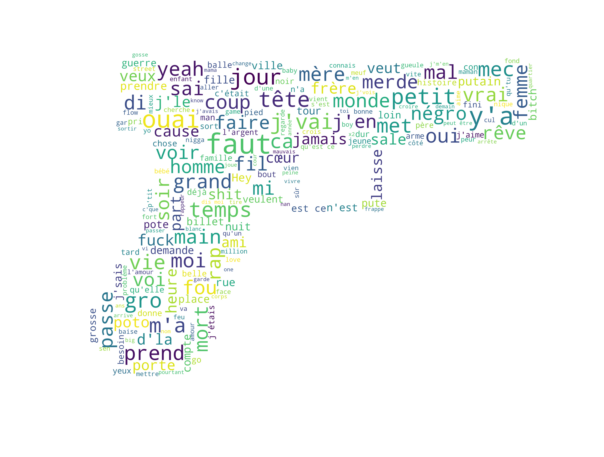

In [9]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud

mask = np.array(Image.open("../img/gun.jpg"))

w = WordCloud(mask=mask, background_color="white")
wordcloud = w.generate(" ".join(" ".join(t) for t in df.filtered_tokens))



# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
